In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns

In [3]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is Id
Column number 2 is SepalLengthCm
Column number 3 is SepalWidthCm
Column number 4 is PetalLengthCm
Column number 5 is PetalWidthCm
Column number 6 is Species


In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.drop("Id",axis=1,inplace=True)

In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
target_data=data.iloc[:,4]

In [11]:
target_data.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
clus_data=data.iloc[:,[0,1,2,3]]

In [13]:
clus_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for i in range(1,11):
    km=KMeans(i)
km.fit(clus_data)
wcss.append(km.inertia_)

In [16]:
np.array(wcss)

array([26.2740101])

In [19]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clus_data)

KMeans(n_clusters=3)

In [20]:
clusters = clus_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clus_data)
clusters.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [21]:
kms.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [24]:
cluster0 = clusters[clusters['Cluster_Prediction'] == 0]
cluster1 = clusters[clusters['Cluster_Prediction'] == 1]
cluster2 = clusters[clusters['Cluster_Prediction'] == 2]


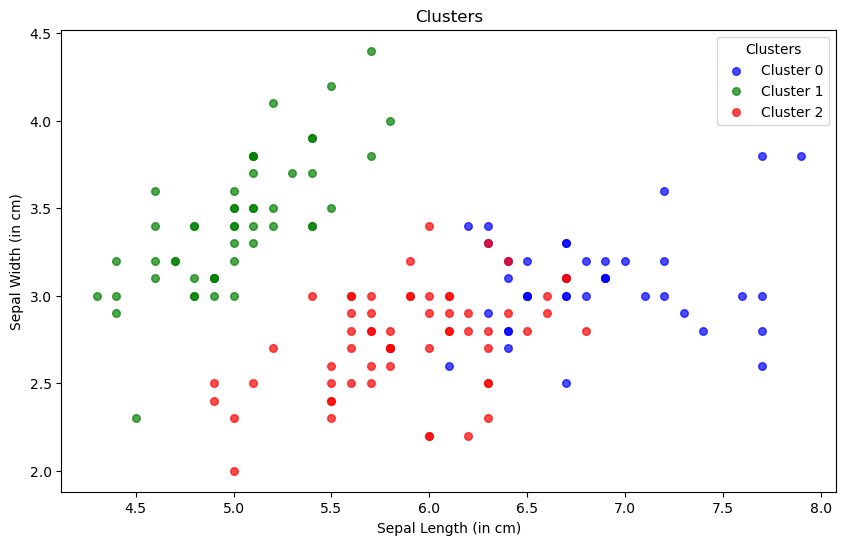

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
plt.scatter(cluster0['SepalLengthCm'], cluster0['SepalWidthCm'], s=30, color='blue', label='Cluster 0', alpha=0.7)
plt.scatter(cluster1['SepalLengthCm'], cluster1['SepalWidthCm'], s=30, color='green', label='Cluster 1', alpha=0.7)
plt.scatter(cluster2['SepalLengthCm'], cluster2['SepalWidthCm'], s=30, color='red', label='Cluster 2', alpha=0.7)

plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.title('Clusters')
plt.legend(title='Clusters')


plt.show()
